# pandas for analysis
  - datset
    - dicctionary of item 
    - list of dictionary
    - csv file
    - excel file
    - json  file 
    - sql connection
  - creating data 
  - reading data
  - manipulation data
  - cleaning data 
  - visualization data
  

In [22]:
import pandas as pd

In [23]:
books ={
    'title':['MOV','the  art of war','ikigai'],
    'author':['shakespear','dun tzu','unknown'],
    'price':[400,1000,300],
}

pd.DataFrame(books)

,title,author,price
0,MOV,shakespear,400
1,the art of war,dun tzu,1000
2,ikigai,unknown,300


In [24]:
movies = [
    {'titles':'abcd','director':'ramo','year':'2016'},
    {'titles':'abcd2','director':'ramo','year':'2018'},
]

pd.DataFrame(movies)

,titles,director,year
0,abcd,ramo,2016
1,abcd2,ramo,2018


In [25]:
pd.read_csv('dummy.csv')

,id,product,price
0,1,apple,100
1,2,banana,50
2,3,orange,80


In [26]:
pd.read_json('dummy.json')

,name,age
0,avi,21
1,ayush,21


In [27]:
pd.read_excel(r"C:\Users\Lenovo\Documents\dummy.xlsx")

,#,name,college
0,1,avichal,amity
1,2,krish,amity
2,3,shantanu,iti


first steps after reading the data
- ` df.head(nrows)`- first n rows
- ` df.tail(nrows)`- last n rows
- ` df,info()` - data types,missing values
- ` df,describe()` - summary statistics
- ` df.shape()`- number of rows and columns
- ` df.columns()` - column names

In [28]:
df.head(2)

NameError: name 'df' is not defined

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.sample(10)

In [ ]:
df.describe() # sumrary statistic  for numrical columns (default)

In [ ]:
df.shape

In [ ]:
print(df.columns.tolist())

In [ ]:
# simple sort
df.sort_values('bedrooms')

# selecting data in pandas
- data frame 
  - rows
    - iloc - index based location
    - loc - label based location
  - columns
    - single column selection
    - multiple column selection
    - column selection by data type
  - conditonal selection
    - boolean indexing 
    - query method 
    

In [ ]:
df

In [ ]:
# select rows from iloc
df.iloc[100] # idx 100 row
# iloc is worked on the basis of the indexing

In [ ]:
# random 5 rows 
df.iloc[[1,59,100,200,300]]


In [ ]:
# random 5 rows with selected column 
df.iloc[[1,10,20],[9,12,14,7,8]]


In [ ]:
df.iloc[[1,10,20],:5]

In [ ]:
df.iloc[15:50, :10]

In [ ]:
# selecting coloumn baseed index
df.iloc[:,[0,5,10,11]]

In [ ]:
df.iloc[:,:]

In [ ]:
# updating index column
df = df.set_index('id')
df.head()

In [ ]:
df

In [ ]:
df.loc[[291310100,1523300141]]

### single column selection
- dictionary like selection
   -`dataframe['column_name']`
- object like selction
   -`dataframe.column_name`

### multiple column selection
-  dictionary like selection\
   -`dataframe[list_of_column_names]`

In [ ]:

df['price']

In [ ]:
df.columns

In [ ]:
df[['bedrooms','price','sqft_basement']]

# boolean indexing
`df['column'] > value`

`df['column'] == value`

`df['column'] != value`

In [ ]:
df[df['price']>1000000]

In [ ]:
df[df['condition']>=5]

In [ ]:
df[df['condition']<=1]

In [ ]:
# 5 starts rated houses + 2 floors 
df[(df['condition']==5) & (df['floors']==2)]

In [ ]:
f1 = df['price']>1000000
f2 = df['condition'] == 5
f3 = df['floors'] == 2
df[f1 & f2 & f3]

In [ ]:
df[f1&f2&f3].reset_index().style.highlight_max(color='blue')

In [ ]:
df[f1&f2&f3].reset_index().style.background_gradient(cmap='GnBu')

In [ ]:
df[f1&f2&f3].reset_index().style.set_properties(color='red',subset=['price'])

In [ ]:
# query 
df.query('price > 2000000')

In [ ]:
df.query('price > 2000000 and condition == 5')

In [ ]:
df.query('price > 2000000 and condition == 5').sort_values('price')

### manipulating and cleaning data
-  removing  column 
-  renaming column
-  adding column
-  changing data types
-  handling missing values
-  dropping missing values
-  using `apply()` method

In [ ]:
df.columns

In [ ]:
cols_to_drop = ['sqft_living15','sqft_lot15']
df = df.drop(columns = cols_to_drop)


In [ ]:
df.columns

In [ ]:
df = df.drop(labels=[7159200005,3761100045])# 2 rows removed

In [ ]:
df.drop_duplicates(subset=['date'])# always use a subset column

In [ ]:
df.dropna() # remove rows with any null values

In [ ]:
name_update = {
    'lat':'latitude',
    'long':'longitude',
}
df = df.rename(columns=name_update)

In [ ]:
df.columns

In [ ]:
# dummy column add
df['dummy'] = 'house_price' # repeats same values in all rows


In [ ]:
df['age'] = 2024-df['yr_built']
df.head()


In [ ]:
# rearranging columns
print(df.columns.tolist())

In [ ]:
columns_seq = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'age','zipcode', 'latitude', 'longitude', 'dummy', 'price']
df = df[columns_seq]
df.head()

In [ ]:
df.info()

In [ ]:
df.floors.dtype

In [ ]:
df.floors = df.floors.astype('int')
df.head()


In [ ]:
df.price.dtype

In [ ]:
df.price = df.price.astype('int')
df.head()

In [29]:
import numpy as np

In [ ]:
fake_df=pd.DataFrame({
    'A':[1,2,3,4,5],
    'B':[6,7,np.nan,9,10],
    'C':[11,12,13,14,None],
    'D':[23,54,65,np.nan,4]
})
fake_df

In [ ]:
fake_df.dropna() 

In [ ]:
df.isnull().sum()

In [ ]:
fake_df.isnull().sum()

In [ ]:
fake_df.fillna(10.0)    

In [ ]:
fake_df.describe()

In [ ]:
b_name= fake_df['B'].mean()
fake_df.B = fake_df.B.replace(np.nan,b_name)
fake_df

In [ ]:
from datetime import datetime
datestr = '20141013T000000'
date = datetime.strptime(datestr,'%Y%m%dT%H%M%S')# str , format
print(date,type(date))

In [ ]:
df.date.apply(lambda d : datetime.strptime(d,'%Y%m%dT000000'))


In [ ]:
datestr= '10-01-2014'
formate = '%d-%m-%Y'
print(datetime.strptime(datestr,formate))

In [ ]:
datestr= '10-01-2014 12:00'
formate = '%d-%m-%Y %H:%M'
print(datetime.strptime(datestr,formate))

## immigration data analysis

In [ ]:
df = pd.read_excel("Canada.xlsx",sheet_name=1,skiprows = 20,skipfooter = 2)
df.head(2)

- rename columns


In [ ]:
cols_to_rename= {
    'OdName':'Country',
    'AreaName':'Continent',
    'RegName':'Region',
    'DevName':'Status',
    }
df= df.rename(columns=cols_to_rename)
df.head(2)

- drop columnS

In [ ]:
# check no of unique values in data 
print("type unique values:",df.Type.nunique())
print("coverage unique values :", df.Coverage.nunique())
# count unique values in a column
print("coverage unique values count\n:", df.Coverage.value_counts())

In [ ]:
cols_to_drop = ['AREA','REG','DEV','Type','Coverage']
df= df.drop(columns= cols_to_drop)
df.head(2)

- set index- not for every dataframe you are

In [ ]:
df = df.set_index('Country')
df.head()

- make all columns to lower case - optional step 

In [ ]:
df.columns = [str(name).lower() for name in df.columns.tolist()]
df.head()

- total rows

In [ ]:
years = list(map(str,range(1980,2014)))
print(years)

In [ ]:
df[years]

In [ ]:
df[years].sum(axis=1) # AXIS 1 for row wise sum , axis 0 for column wise sum

In [ ]:
df['total']=df[years].sum(axis=1)
df.head()

- visualization

In [ ]:
df.isnull().sum().plot(figsize=(10,1),kind='bar')

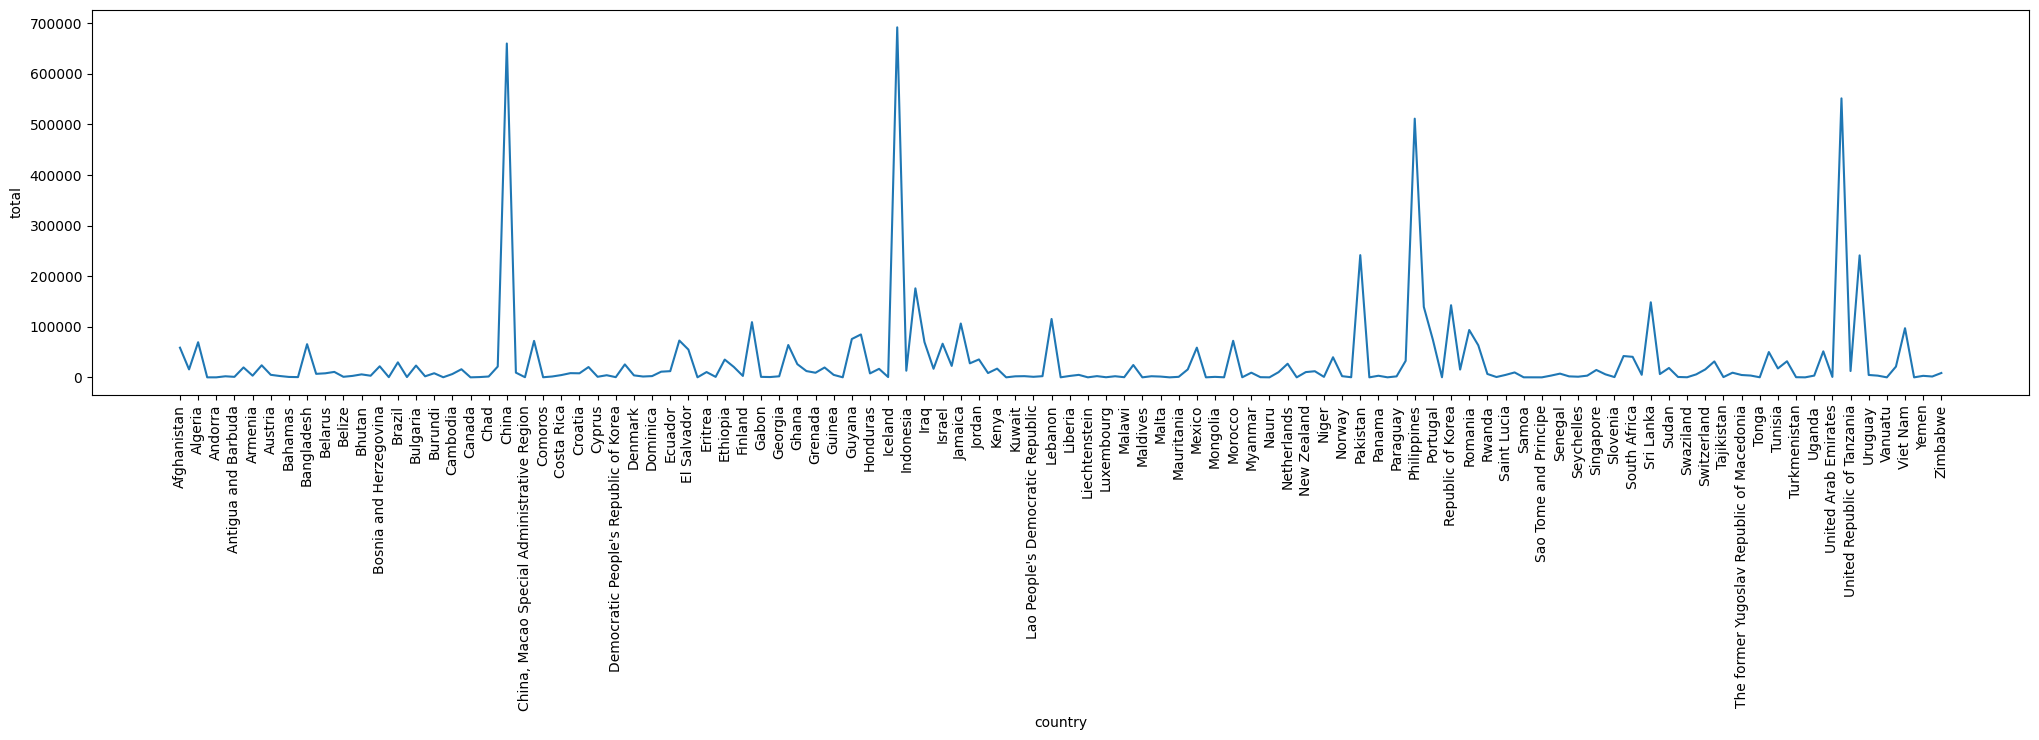

In [ ]:
df.total.plot(rot= 90,figsize=(25,5),
              xticks = range(0,df.shape[0],2),
              xlabel= 'country',
              ylabel = 'total',
              )


<Axes: title={'center': 'top 25 country with the highest immigration'}, xlabel='country', ylabel='immigration'>

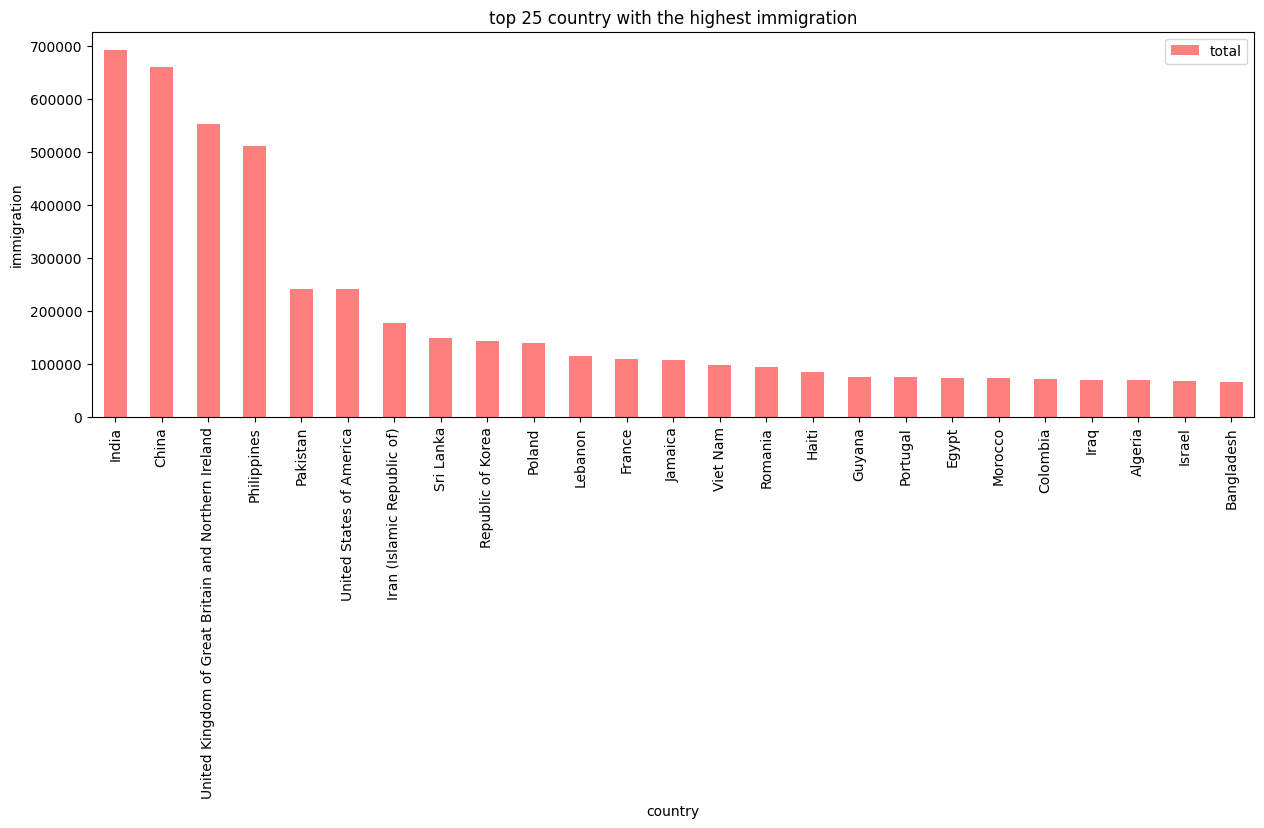

In [ ]:
df.sort_values('total',ascending=False).head(25).plot(
    kind = 'bar',
    y = 'total',
    figsize=(15,5),
    title='top 25 country with the highest immigration',
    color = 'red',
    alpha = .5,
    xlabel='country',
    ylabel='immigration',
)